# **AP155 Lab Assignment** 
## Module 5: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 3 are worth 25, 25, and 50 points, respectively).

_Due Date_: **5PM of December 7 (Tue)**


### Student Information 

_Full Name (Last Name, First Name)_: Hans Emmanuel Hernandez\
_Student No._: 2020-11387\
_Section_: THU-HX-4

### Submission Information

_Date and Time Submitted (most recent upload)_: November 30

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: HANS EMMANUEL HERNANDEZ** 

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/25
* Problem 2 - []/25
* Problem 3 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (25 pts.; 50/50 for code & discussion) 
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits. 

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(15 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$. 

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(10 pts.)*

In [1]:
import numpy as np
from numpy import *
import pandas as pd
import math
from math import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

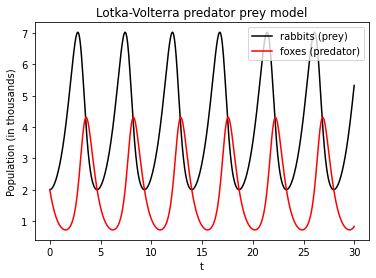

In [2]:
# Define the variables
a = 0.0                              # lower bound for time
b = 30.0                             # upper bound for time
N = 1000.0                           # no. of slices
h = (b-a)/N                          # formula of width

alpha = 1.0                          # constants
beta = 0.5
gamma = 0.5
delta = 2.0

# Define the given Lotka-Volterra models
def f(r, t):
  x = r[0]                            # assign the first element of r array as x
  y = r[1]                            # assign the next element of r array as y
  fx = alpha*x - beta*x*y             # reproduction rate of rabbits
  fy = gamma*x*y - delta*y            # reproduction rate of foxes
  return array([fx, fy], float)       # returns an array with both LV equations as its elements

# Create an array for time points then initialize lists for x and y points
tpoints = arange(a, b, h)             # returns 1000 evenly spaced points
xpoints = []                          # initialize array for x points
ypoints = []                          # initialize array for y points

# Assign the given initial values for x and y in the r array
r = array([2, 2], float)

# Implement the 4th order Runge Kutta method
for t in tpoints:                     # goes through each element in the tpoints array
  xpoints.append(r[0])                # append computed value in list
  ypoints.append(r[1])                # append computed value in list
  k1 = h*f(r,t)                       # 4th order Runge Kutta method equations from Newman text
  k2 = h*f(r + 0.5*k1, t + 0.5*h)     # call for user-defined LV equations 
  k3 = h*f(r + 0.5*k2, t + 0.5*h)
  k4 = h*f(r + k3, t + h)             # derived terms are accurate up to h^4
  r += (k1 + 2*k2 + 2*k3 + k4)/6      # update the value of r for every iteration which then updates the x and y values
                                      # to be used in the next iteration
# Plot
title("Lotka-Volterra predator prey model")                     # set title
xlabel("t")                                                     # set axis label
ylabel("Population (in thousands)")                             # set axis label
plot(tpoints, xpoints, 'k', label = 'rabbits (prey)')           # plot x (prey) as a function of time
plot(tpoints, ypoints, 'r', label = 'foxes (predator)')         # plot y (predator) as a function of time
legend()                                                        # show legend in plot
show()                                                          # show plot

### PROBLEM 2 (25 pts.; 50/50 for code & discussion)

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(15 pts.)*

2. Make a graph of $\theta$ as a function of time. *(10 pts.)*


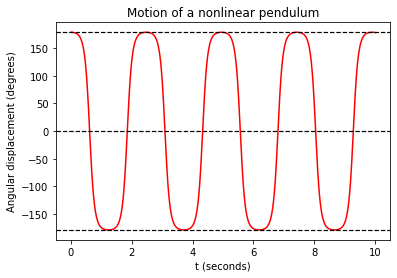

In [63]:
# Define variables
g = 9.81                                # gravitational constant
l = 0.1                                 # length of pendulum arm in m
theta_0 = 179 * pi / 180                # convert degrees to radians
omega_0 = 0.0                           # initial angle
t_0 = 0.0                               # initial time
t_max = 10.0                            # final time 
N = 5000                                # slices
h = (t_max - t_0) / N                   # formula of width

# Redefine the previous function
def f(r, t):
    theta = r[0]                                 # assign the first element of r array as theta
    omega = r[1]                                 # assign the next element of r array as omega
    ftheta = omega                               # equation 8.45: first-order equation for theta
    fomega = - (g/l) * sin(theta)                # equation 8.46: first order equation for omega
    return array([ftheta, fomega], float)        # returns an array with both equations as its elements

tpoints = arange(t_0, t_max, h)                  # creates an array with 5000 evenly spaced points from 0 to 10 excluding last
thetapoints = []                                 # intialize list for theta points

# Assign the given initial values for initial theta and initial omega in the r array
r = array([theta_0, omega_0], float)        

# Implement the 4th order Runge Kutta method
for t in tpoints:                                # goes through each element in tpoints array
    thetapoints.append(r[0])                     # append computed value in list 
    k1 = h * f(r, t)                             # call for user-defined equations
    k2 = h * f(r + 0.5*k1, t + 0.5*h)
    k3 = h * f(r + 0.5*k2, t + 0.5*h)
    k4 = h * f(r + k3, t + h)                    # derived terms are accurate up to h^4
    r += (k1 + 2*k2 + 2*k3 + k4)/6               # update the value of r for every iteration 
                                                 # which then updates the theta and omega values for the next iteration

# Plot
deg = array(thetapoints, float)*180/pi                        # convert radians units back to degrees
title("Motion of a nonlinear pendulum")                       # set title
xlabel("t (seconds)")                                         # set axis label
ylabel("Angular displacement (degrees)")                      # set axis label
plot(tpoints, deg, 'r')                                       # plot theta as a function of time
axhline(y = 0, color = 'k', linestyle = '--', linewidth = 1.2)             # axis line for midpoint
axhline(y= max(deg), color = 'k', linestyle = '--', linewidth = 1.2)       # axis line for maximum
axhline(y = min(deg), color = 'k', linestyle = '--', linewidth = 1.2)      # axis line for minimum
show()                                                        # show plot

### PROBLEM 3 (50 pts.; 50/50 for code & discussion)

**Quantum Oscillators**

_Refer to Exercise 8.14 of the Newman text_ Consider the one-dimensional, time-independent Schrodinger equation in a harmonic (i.e., quadratic) potential $V(x) = V_0 x^2 / a^2$, where $V_0$ and $a$ are constants. 

1. Modify the code from Example 8.9 to find the energies of the ground state and the first two excited states for this potential when $m$ is the electron mass, $V_0 = 50$ eV, and $a = 10^{-11}$ m. Note that in theory the wavefunction goes all the way out to $x = \pm \infty$, but you can get good answers by using a large but finite interval. Try using $x = - 10a$ to $+10a$, with the wavefunction $\psi = 0$ at both boundaries. (In effect, you are putting the harmonic oscillator in a box with impenetrable walls.) The wavefunction is real everywhere, so you don't need to use complex variables, and you can use evenly spaced points for the solution-- there is no need to use an adaptive method for this problem.

   The quantum harmonic oscillator is known to have energy states that are equally spaced. Check that this is true, to the precision of your calculation, for your answers. (Hint: The ground state has energy in the range 100 to 200eV.) *(20 pts.)*

2. Modify the code from (1) to calculate the same three energies for the anharmonic oscillator with $V(x) = V_0 x^4 /a^4$, with the same parameter values. *(10 pts.)*

3. Calculate the properly normalized wavefunctions of the anharmonic oscillator for the three states. To normalize the wavefunctions you will have to calculate the value of the integral $\int_{-\infty}^{+\infty} |\psi(x)|^2 {\rm d}x$ and then rescale $\psi$ appropriately to ensure that the area under the square of each of the wavefunctions is 1. Either the trapezoidal rule or Simpson's rule will give you a reasonable value for the integral. *(15 pts.)*

   Note that you may find a few very large values at the end of the array holding the wavefunction. Where do these large values come from? Are they real, or spurious? One simple way to deal with the large values is to make use of the fact that the system is symmetric about its midpoint and calculate the integral of the wavefunction over only the left-hand half of the system, then double the result. This neatly misses out the large values. 

4. Make a plot of the normalized wavefunctions from (3), all on the same axes, as a function of $x$ over a modest range near the origin-- say $x = -5a$ to $x =+5a$. *(5 pts.)*



**ENERGY STATES FOR QUANTUM HARMONIC OSCILLATOR**

In [64]:
# Define variables
m = 9.10938 * 10 ** -31          # electron mass in kg
hbar = 1.05457 * 10 ** -34       # planck's eponymous constant
e = 1.6022e-19                   # electron charge in coulombs
a = 1e-11                        # angstrom unit
V0 = 50*e                        # convert eV to J
N = 1000                         # slices
x_0 = -10 * a                    # initial value of x
x_f = 10 * a                     # final value of x
h = (x_f - x_0) / N              # width formula

# Define a function for the harmonic potential
def V(x):
  return V0*x**2 / a**2

# Define the time-independent Schrodinger equation as two first-order ODEs
def f(r, x, E):
  psi = r[0]                                      # assign the first element of r array as psi
  phi = r[1]                                      # assign the next element of r array as phi
  fpsi = phi                                      # first-order ODE for psi
  fphi = (2*m / hbar**2) * (V(x) - E) * psi       # first-order ODE for phi
  return array([fpsi, fphi], float)               # returns an array with both ODEs as its elements

# Define a function that solves for a particular wavefunction given a specified energy
def solve(E):
  psi = 0.0                                       # initial value for psi
  phi = 1.0                                       # initial value for phi
  r = array([psi, phi], float)                    # array of psi and phi elements

# Implement the 4th-order Runge-Kutta method
  for x in arange(x_0, x_f, h):                   # loops through array of evenly spaced values between x_0 and x_f (excluding last)
    k1 = h*f(r, x, E)                             # call for user-defined functions
    k2 = h*f(r + 0.5*k1, x + 0.5*h, E)
    k3 = h*f(r + 0.5*k2, x + 0.5*h, E)
    k4 = h*f(r + k3, x + h, E)                    # derived terms are accurate up to h^4
    r += (k1 + 2*k2 + 2*k3 + k4) / 6              # update the value of r for every iteration
  
  return r[0]                                     # returns first element of r array

target = e/1000                                   # set target accuracy

# Define Secant method for finding energies
def secant(E1, E2):
  psi2 = solve(E1)                                       # call for user-defined function to solve for guess then assign it to psi2
  while abs(E1-E2) > target:                             # loops while value is still larger than target accuracy
    psi1, psi2 = psi2, solve(E2)                         # assign solve(E1) as new psi1, assign solve(E2) as new psi2
    E1, E2 = E2, E2 - psi2*(E2-E1) / (psi2 - psi1)       # iterate values using secant method formula where new E2 is the new 'better' guess

  return E2/e                                            # returns energy for specified guess intervals

In [65]:
# Call for the user-defined secant function to solve for the energies given initial guesses within the specified interval
en0 = secant(0.0, e)                  # ground state
en1 = secant(200*e, 400*e)            # first excited state
en2 = secant(500*e, 700*e)            # second excited state
en3 = secant(700*e, 850*e)            # third excited state
print (f'The ground state energy is given by E0 = {en0} eV.')
print (f'The first excited state energy is given by E1 = {en1} eV with a factor of {int(en1/en0)}n from the ground state.')
print (f'The second excited state energy is given by E2 = {en2} eV with a factor of {int(en2/en0)}n from the ground state.')
print (f'The third excited state energy is given by E3 = {en3} eV with a factor of {int(en3/en0)}n from the ground state.')      # i included the third excited state energy to prove even spacing of the energy states

The ground state energy is given by E0 = 138.02019647905607 eV.
The first excited state energy is given by E1 = 414.06059205900044 eV with a factor of 3n from the ground state.
The second excited state energy is given by E2 = 690.100987976501 eV with a factor of 5n from the ground state.
The third excited state energy is given by E3 = 966.1413857187235 eV with a factor of 7n from the ground state.


**As we can see, the energy states are evenly spaced by odd factors of 1n, 3n, 5n, 7n, ...... where n is the ground state energy.**

**ENERGY STATES FOR QUANTUM ANHARMONIC OSCILLATOR**

In [66]:
# Redefine the potential function for the anharmonic oscillator
def V(x):
  return V0*x**4 / a**4

In [67]:
# Call for the user-defined secant function to solve for the energies given initial guesses within the specified interval
en0 = secant(0.0, e)                  # ground state
en1 = secant(400*e, 600*e)            # first excited state
en2 = secant(900*e, 1100*e)           # second excited state
print (f'The ground state energy is given by E0 = {en0} eV.')
print (f'The first excited state energy is given by E1 = {en1} eV with a factor of {int(en1/en0)}n from the ground state.')
print (f'The second excited state energy is given by E2 = {en2} eV with a factor of {int(en2/en0)}n from the ground state.')

The ground state energy is given by E0 = 205.29941690052826 eV.
The first excited state energy is given by E1 = 735.6644198706144 eV with a factor of 3n from the ground state.
The second excited state energy is given by E2 = 1443.5167812712064 eV with a factor of 7n from the ground state.


**NORMALIZED WAVEFUNCTIONS**

In [68]:
# Define variables
a = 1.e-11                   # angstrom unit
x1 = -5 * a                  # lower bound
x2 = 5 * a                   # upper bound
N = 1000                     # slices
h = (x2 - x1) / N            # width formula

# Create an array of evenly spaced points from x1 to x2 (excluding last)
tpoints = arange(x1, x2, h)

# Define previous wavefunction
def wavefunc(E):
  xpoints = []                                    # initialize list for xpoints
  psi = 0.0                                       # initial psi
  phi = 1.0                                       # initial phi
  r = array([psi,phi], float)                     # array of psi and phi elements

  for t in tpoints:                               # loops through elements in tpoints
    xpoints.append(r[0])                          # append latest value of r[0] to xpoints list
    k1 = h*f(r, t, E)                             # call for user-defined functions
    k2 = h*f(r + 0.5*k1, t + 0.5*h, E)
    k3 = h*f(r + 0.5*k2, t + 0.5*h, E)
    k4 = h*f(r + k3, t + h, E)                    # derived terms are accurate up to h^4
    r += (k1 + 2*k2 + 2*k3 + k4) / 6              # update the value of r for every iteration
  
  return xpoints                                  # returns array of xpoints (wavefunctions)

# Unnormalized values of psi arrays
# Note that we convert the energies back to joules so we multiply them by e
psi_0 = array(wavefunc(en0 * e))                  # ground state
psi_1 = array(wavefunc(en1 * e))                  # first excited state
psi_2 = array(wavefunc(en2 * e))                  # second excited state

In [69]:
# Define the Simpson's rule
def simpson(psi):
  I_0, I_1, I = 0.0, 0.0, 0.0           # initialize the integral estimate
  for k in range(1,N,2):                # loop over the odd values of k
      I_0 += 4*psi[k]
  for k in range(2,N,2):                # loop over the even values of k
      I_1 += 2*psi[k]
  s = (1./3)*(I_0 + I_1)                # Simpson's rule formula
  return(s)                             # returns value of integral estimate

# Normalization constants
# This is just 1/sqrt of integral of wavefunction squared over all space
A0 = sqrt(1/simpson(psi_0 ** 2))        # ground state
A1 = sqrt(1/simpson(psi_1 ** 2))        # first excited state
A2 = sqrt(1/simpson(psi_2 ** 2))        # second excited state

# Values for normalized wavefunctions
# Multiply the normalization constants back to their unnormalized wavefunctions
norm_0 = A0 * psi_0                     # ground state
norm_1 = A1 * psi_1                     # first excited state
norm_2 = A2 * psi_2                     # second excited state

# Present the data using a dataframe
print('Normalized wavefunctions for each energy state')
data = pd.DataFrame({r'Ground-state (psi)':norm_0, r'First excited state (psi)':norm_1,r'Second excited state (psi)':norm_2})      # assign columns
data

Normalized wavefunctions for each energy state


,Ground-state (psi),First excited state (psi),Second excited state (psi)
0,0.000000e+00,0.000000e+00,0.000000e+00
1,1.112256e-09,3.955894e-09,1.207432e-08
2,2.233495e-09,7.943191e-09,2.424223e-08
3,3.372643e-09,1.199307e-08,3.659663e-08
4,4.538620e-09,1.613668e-08,4.923025e-08
...,...,...,...
995,9.160867e-06,1.705508e-04,-4.031227e-04
996,9.987417e-06,1.858229e-04,-4.387327e-04
997,1.089282e-05,2.025362e-04,-4.776639e-04
998,1.188492e-05,2.208334e-04,-5.202415e-04


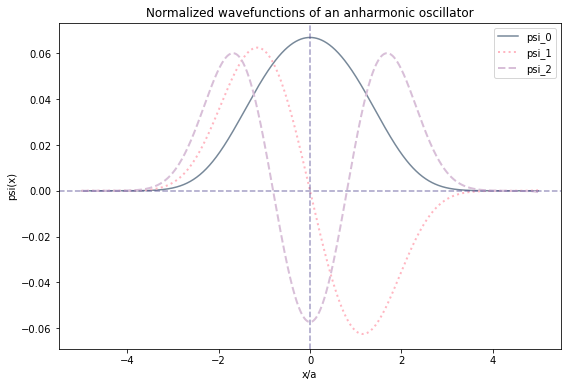

In [72]:
# Rescale x points
x_points = tpoints / a

# Plot
fig,ax = plt.subplots(figsize=(9,6))                     
ax.plot(x_points, norm_0, label = 'psi_0', color = 'lightslategray', linewidth = 1.5)                   # psi_0
ax.plot(x_points, norm_1, label = 'psi_1', color = 'lightpink', linestyle = 'dotted',linewidth = 2)     # psi_1
ax.plot(x_points, norm_2, label = 'psi_2', color = 'thistle', linestyle = 'dashed',linewidth = 2)       # psi_2
ax.axvline(0, color = 'darkslateblue', linestyle = '--', alpha = 0.5)                                   # set axis line
ax.axhline(0, color = 'darkslateblue', linestyle = '--', alpha = 0.5)                                   # set axis line
ax.legend()                                                                                             # show legend
title("Normalized wavefunctions of an anharmonic oscillator")                                           # set title
xlabel('x/a')                                                                                           # set axis label
ylabel('psi(x)')                                                                                        # set axis label
show()                                                                                                  # show plot